## Topic Modeling

- allows us analyze large text by clustering documents into topics.

- these large amout of text is unlabeled.

- We don't know the correct topic ,all we know is that documents clustered together share similar topic ideas
- And there is no way to evaluate these unsupervised learning algorithms

johann dirichlet ,there is a propability distribution named after him  `Dirichlet Distribution`


LDA published as a graphical model for topic discovery in 2003 by Andrew Ng and others

## latent Dirichlet Allocation LDA

* discover topics for a corpus of documents

**Assumptions of LDA for topic modeling**

- Documents with similar topics use similar groups of words
- Latent topics can be found by searching for groups of words that frequently occur together in documents across the corpus
- Documents are probability distributions over latent topics 
- Topics themselves are probability distributions over words

document has a probability distribution over topics
means docuent belongs to docuemnt with hight prob distribution




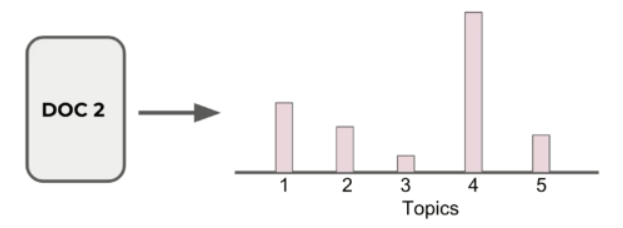

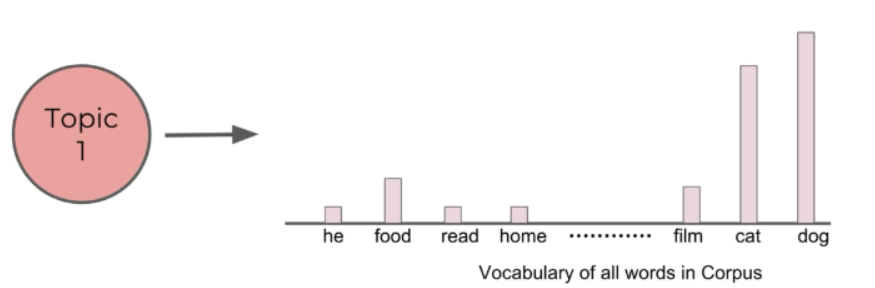

Suppose we have some Documents

we choose fixed number of topics `K` to discover then use LDA to learn
the topic representation of each document,and the words associated to each topic

Go through each document, and randomly assign each word in the document to one of the `K` topics

Then iterate over every word in every document and 

calculate : 
- P(topic **t** | document **d**) 
- P(word **w**| topic **t**) 

Reassign word w a new topic ,where we choose topic t 
with probability: P(topic **t** | document **d**) * P(word **w**| topic **t**) 
 
After repeating the previous step a large number of times ,
 we reach a steady state where the assignments are acceptable
 
At the end we have each document assigned to a topic 

we also can search for words with highest prbability of being assigned to a topic

# Start Coding

## Data

We will be using articles from NPR (National Public Radio), obtained from their website [www.npr.org](http://www.npr.org)

In [8]:
import pandas as pd
import numpy as np

df=pd.read_csv(r'npr.csv')

In [9]:
df.head()

,Article
0,"In the Washington of 2016, even when the polic..."
1,Donald Trump has used Twitter — his prefe...
2,Donald Trump is unabashedly praising Russian...
3,"Updated at 2:50 p. m. ET, Russian President Vl..."
4,"From photography, illustration and video, to d..."


In [1]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [2]:
cv=CountVectorizer(max_df=0.9,min_df=2,stop_words='english')
#max_df means ignore words that its frequency across all docs exceeds that thresh
#igonre words that its frequency larger than given thresh
#min_df means igonre words that its frequency lower than thresh
#if min_df=2 ,romve words that doesn't appear in atleast 2 document
#word must show in atleast 2 docs
# if min_df=0.2 ,so its behavoir will be similar to max_df

In [14]:
#dtm,doc term matrix

In [15]:
dtm=cv.fit_transform(df['Article'])

In [16]:
dtm

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3033388 stored elements and shape (11992, 54777)>

In [17]:
from sklearn.decomposition import LatentDirichletAllocation

In [18]:
LDA=LatentDirichletAllocation(n_components=7,random_state=42)

In [19]:
LDA.fit(dtm)

LatentDirichletAllocation(n_components=7, random_state=42)

In [23]:
#3 steps left
# grab the vocabulary of words
# Grap the topics
# Grap the highest probability words per topic

In [24]:
# grab the vocabulary of words

In [27]:
len(cv.get_feature_names_out())

54777

In [39]:
# Grap the topics

In [41]:
len(LDA.components_)

7

In [42]:
LDA.components_.shape

(7, 54777)

In [ ]:
# Grap the highest probability words per topic

In [44]:
single_topic=LDA.components_[0]

In [63]:
max_indecies=single_topic.argsort()[-20:]

In [64]:
max_indecies

array([38079, 46581, 48643, 25406, 50426, 10421, 32089, 54403, 18349,
           1, 33390, 36310, 21228, 10425, 31464,  8149, 36283, 22673,
       42561, 42993], dtype=int64)

In [65]:
cv.get_feature_names_out()[max_indecies]

array(['president', 'state', 'tax', 'insurance', 'trump', 'companies',
       'money', 'year', 'federal', '000', 'new', 'percent', 'government',
       'company', 'million', 'care', 'people', 'health', 'said', 'says'],
      dtype=object)

# Top_15 words for each Topic

In [77]:
for index,topic in enumerate(LDA.components_):
    ids=topic.argsort()[-15:]
    print(f'topic:{index+1}')
    top_15=cv.get_feature_names_out()[ids]
    print(top_15)
    print('\n')

topic:1
['companies' 'money' 'year' 'federal' '000' 'new' 'percent' 'government'
 'company' 'million' 'care' 'people' 'health' 'said' 'says']


topic:2
['military' 'house' 'security' 'russia' 'government' 'npr' 'reports'
 'says' 'news' 'people' 'told' 'police' 'president' 'trump' 'said']


topic:3
['way' 'world' 'family' 'home' 'day' 'time' 'water' 'city' 'new' 'years'
 'food' 'just' 'people' 'like' 'says']


topic:4
['time' 'new' 'don' 'years' 'medical' 'disease' 'patients' 'just'
 'children' 'study' 'like' 'women' 'health' 'people' 'says']


topic:5
['voters' 'vote' 'election' 'party' 'new' 'obama' 'court' 'republican'
 'campaign' 'people' 'state' 'president' 'clinton' 'said' 'trump']


topic:6
['years' 'going' 've' 'life' 'don' 'new' 'way' 'music' 'really' 'time'
 'know' 'think' 'people' 'just' 'like']


topic:7
['student' 'years' 'data' 'science' 'university' 'people' 'time' 'schools'
 'just' 'education' 'new' 'like' 'students' 'school' 'says']




In [79]:
topic_results=LDA.transform(dtm)

In [83]:
topic_results.shape

(11992, 7)

In [89]:
topic_results.argmax(axis=1)

array([1, 1, 1, ..., 3, 4, 0], dtype=int64)

In [90]:
df['Topic']=topic_results.argmax(axis=1)

In [91]:
df

,Article,Topic
0,"In the Washington of 2016, even when the polic...",1
1,Donald Trump has used Twitter — his prefe...,1
2,Donald Trump is unabashedly praising Russian...,1
3,"Updated at 2:50 p. m. ET, Russian President Vl...",1
4,"From photography, illustration and video, to d...",2
...,...,...
11987,The number of law enforcement officers shot an...,1
11988,"Trump is busy these days with victory tours,...",4
11989,It’s always interesting for the Goats and Soda...,3
11990,The election of Donald Trump was a surprise to...,4
